# <font color='blue' style="font-size: 74px;">**Introduction to Cheminformatics**</font>

<div>
<img src="media/cheminformatics.png" width="900" height=350 style="background-color:white;padding:20px;"/>
</div>

> - Cheminformatics is a field of information technology that focuses on the collection, storage, analysis, and manipulation of chemical data.
> - The chemical data of interest typically includes information on small molecule formulas, structures, properties, spectra, and activities (biological or industrial)

David S. Wishart, 2015. _"Introduction to Cheminformatics"_, Curr. Protoc. Bioinform. 53: 14.1.1-14.1.21. doi: 10.1002/0471250953.bi1401s53

Here, we will have a small introduction to a package widely used for cheminformatics, [RDKit](https://www.rdkit.org/).

# What is RDKit?

RDKit is an open source package created originally in C++ for dealing with molecules. It also has a full Python API, and can be used in python scripts or notebooks, making it very convenient.With RDKit, it is possible to:
- Read and write molecular files in various molecular formats (SMILES, SDF, PDB...)
- Depict and visualize molecules in 2D
- Geerate various types of molecular fingerprints
- Calculate molecular properties (descriptors)
- Generate 3D conformers and simple energy minimizations
- Serach for substructures
- Perform reactions
- etc.

This is just a small list of what is possible with RDKit. The full package has many, *many* more capabilities, and will not be fully described here. I encourage you to explore the RDKit page for more information.

## RDKit Structure
RDKit is organized in subpackages. You can find the full tree [here](https://www.rdkit.org/docs/source/rdkit.html). Here are some of the most important subpackages:

| Module | Description   |
|------|------|
|   `Chem`  | The main RDKit module, contains the most used tools. "A module for molecules and stuff" ([RDKit website](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem)) |
| `Chem.AllChem` | To speed up loading time, more advanced and less used functionalit are not loaded by default. To get access to the full set of chemistry tools, you must load the `AllChem` submodule. ([API](https://www.rdkit.org/docs/source/rdkit.Chem.AllChem.html#module-rdkit.Chem.AllChem)). See a more detailed explanation of the `Chem` vs `AllChem` difference [here](https://rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchemhttps://rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchem).|
| `Chem.Descriptors` | Submodule to calculate molecular properties (descriptors) ([API](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html#module-rdkit.Chem.Descriptors)) |
| `Chem.Draw` | Functionality to draw molecules ([API](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html)) |
| `ML` | Machine-learning related code ([API](https://www.rdkit.org/docs/source/rdkit.ML.html#rdkit-ml-package)) |



## Other Cheminformatics Packages
Although it is probably the most used package for cheminformatics, RDKit is not he only one, and other packages may have distinct advantages. Here's a small list of alternatives:

- [OpenBabel](https://openbabel.org/)
- [MayaChemTools](http://www.mayachemtools.org/)
- [Chemistry Development Kit (CDK)](https://cdk.github.io/)
- [OEChem TK (OpenEye/Cadence Software)](https://www.eyesopen.com/oechem-tk)

# The SMILES Molecular Format
SMILES (_"Simplified Molecular Input Line Entry System"_) is a plain text notation used
to represnt molecules in a compact, human readable format. It is widely used in computational
chemistry and cheminformatics.

In the SMILES format,
 - **Atoms** are represented by their chemical symbol
   - Aromatic atoms are represnted in lowercase
   - Hydrogens are implicit, but can be explicitly added if needed
 - **Bonds** are represented by symbols as:
   - Single bonds: "-"
   - Double bonds: "="
   - Triple bonds: "#"
   - When not indicated, single bonds are assumed
 - **Branches** in molecules are denoted by writing the branch atoms in parenthesis
 - **Rings** are formed by using numbers to indicate the connection atoms
 - **Stereochemistry** can be indicated with special symnbols for chirality and double bond configurations
 
 Here are a couple of examples:
<div>
<img src="media/SMILES.png" width="900" height=350 style="background-color:white;padding:20px;margin:auto"/>
</div>
 
 

 ## Some downsides of SMILES:
 - SMILES are not unique. There may be different SMILES strings that refer to the same molecule. For eample:
     - Aspirin can also be written as: `O=C(C)Oc1ccccc1C(=O)O`
     - Caffeine can also be written as: `Cn1c(=O)c2c(ncn2C)n(C)c1=O`
     - Note that this can actually be an advantage for data augmentation.
     
 - Not all SMILES are valid
     - A small change of 1 character may render the whole SMILES invalid.

Still, as it is the simplest and most used format, we will use it here.
     
## More information about the SMILES laguage can be found in:
  - [The OpenSMILES Specification](http://opensmiles.org/opensmiles.html)
  - [SMILES - A Simplified Chemical Language (Daylight)](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)

## Other Molecular Formats
SMILES is not the only line-input format. Here's some alternatives:
- [InChI](https://www.inchi-trust.org/): The International Chemical Identifier. Maintained by IUPAC it was developed to help database searches. All molecules have a unique InChI string.
    - Caffeine: `InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3`
    - Aspirin: `InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)`
- [SELFIES](https://github.com/aspuru-guzik-group/selfies): Developed specifically for machine learning tasks. Every SELFIE is a valid molecule, and there's a unique SELFIE for every molecule.
    - Aspirin: `[O][=C][Branch1][C][C][O][C][=C][C][=C][C][=C][Ring1][=Branch1][C][=Branch1][C][=O][O]`
    - Caffeine: `[C][N][C][=Branch1][C][=O][C][=C][Branch1][#Branch1][N][=C][N][Ring1][Branch1][C][N][Branch1][C][C][C][Ring1][N][=O]`
    
We wil be using SMILES here, but feel free to use other formats!
    

# Getting Started with RDKit

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

print("RDKit version: ", rdkit.__version__)

RDKit version:  2024.03.5


Let's start with a simple example. We can initialize a molecule object from the SMILES code for it. For example, here is the Aspirin molecule:

In [2]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')

All that this command did was to create the object. To visualize the molecule, just type the name:

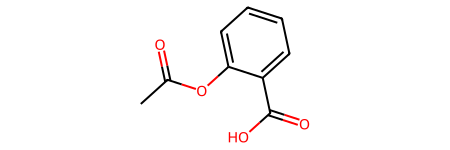

In [3]:
aspirin

Once the `Mol` object is created, we can convert it to other formats, as below (The "mol" format is basically the same as the "SDF" format):

In [4]:
print('SMILES: ', Chem.MolToSmiles(aspirin))
print('InChI:  ', Chem.MolToInchi(aspirin))
print('Mol Format:\n-----------')
print(Chem.MolToMolBlock(aspirin))
print('PDB Format:\n-----------')
print(Chem.MolToPDBBlock(aspirin))

SMILES:  CC(=O)Oc1ccccc1C(=O)O
InChI:   InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)
Mol Format:
-----------

     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O

<div class="alert alert-info">
<b>NOTE:</b> 

Notice the zeroes in the "Z" coordinate for the Mol format, and in all coordinates for the PDB format. 
This happens because 3D coordinates are only calculated if explicitly requested, or if needed for stereochemistry assignment. 
The Mol format inlcudes stereochemistry, which makes RDKit calculate the coordinates to assign those. Still, since 
it's just to assign stereochemistry, it doesn't neet the "Z" coordinates.
The PDB format does not contain stereochemistry, so the coordinates are never calculated unless explicitly requested. (More on this later.)

There's a discussion about that [here](https://sourceforge.net/p/rdkit/mailman/message/36361173/).
</div>

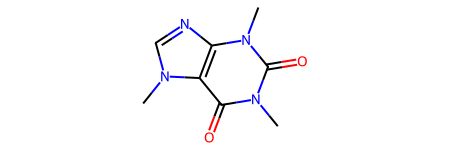

In [5]:
caffeine=Chem.MolFromSmiles('O=C(N(C1=O)C)N(C2=C1N(C=N2)C)C')
caffeine

In [6]:
# exercise: Try to generate the caffeine molecule in other formats as well.

# Visualizing
Here's some other ways to visualize structures:

In [7]:
import pandas as pd

In [8]:
aminoacids_df = pd.read_csv('data/aminoacids.csv')
aminoacids_df.head()

,name,SMILES
0,alanine,C[C@@H](C(=O)[O-])[NH3+]
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-]
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-]
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-]
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S


In [9]:
aminoacids_mols = [Chem.MolFromSmiles(x) for x in aminoacids_df.SMILES ]
aminoacids_mols

We can visualize those in a grid:

In [10]:
aminoacids_names = list(aminoacids_df.name.values)
aminoacids_names

['alanine',
 'arginine',
 'asparagine',
 'aspartate',
 'cysteine',
 'glutamine',
 'glutamate',
 'glycine',
 'histidine',
 'isoleucine',
 'leucine',
 'lysine',
 'methionine',
 'phenylalanine',
 'proline',
 'serine',
 'threonine',
 'tryptophan',
 'tyrosine',
 'valine']

In [11]:
from rdkit.Chem import Draw

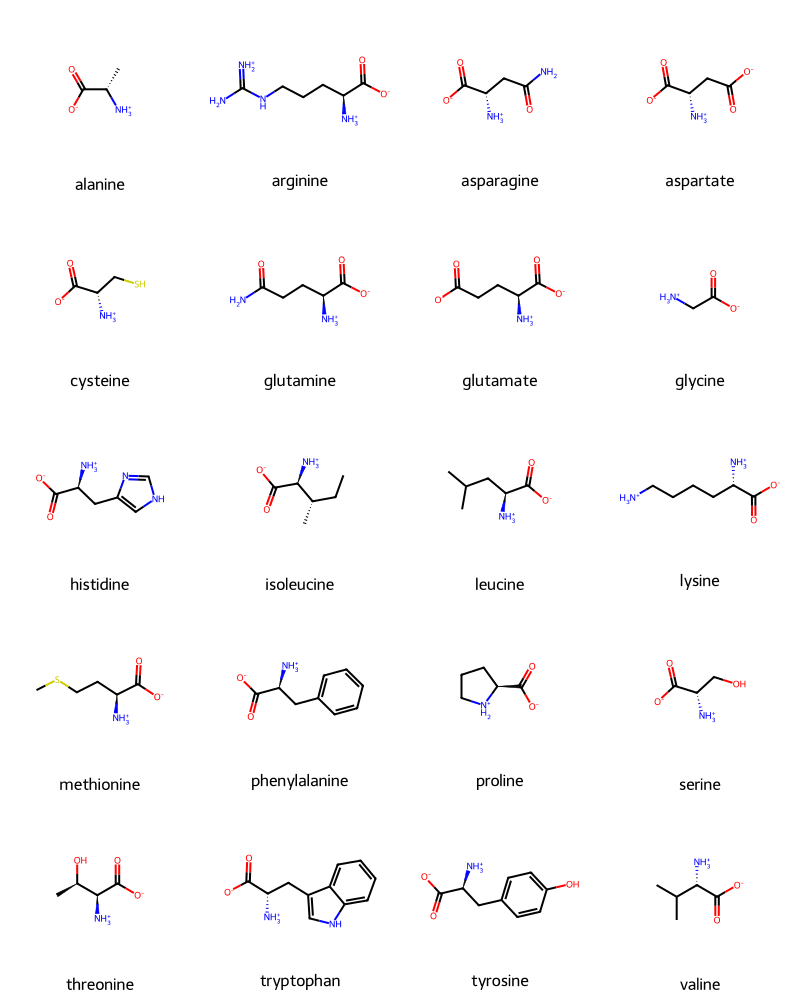

In [12]:
Draw.MolsToGridImage(aminoacids_mols, # Everything below here is optional
                     molsPerRow=4,
                     subImgSize=(200,200),
                     legends=aminoacids_names,
                     useSVG=True)

# The PandasTools Module
Much of the work can also be done directly inside a Pandas DataFrame:

In [13]:
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames()

,name,SMILES,ROMol
0,alanine,C[C@@H](C(=O)[O-])[NH3+],
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-],
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-],
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-],
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S,

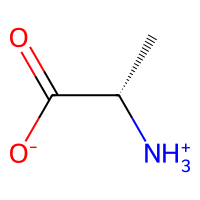
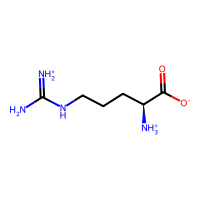
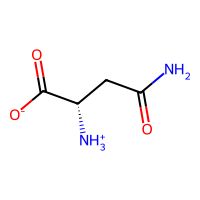
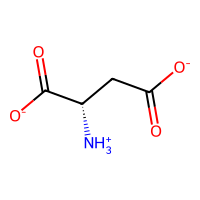
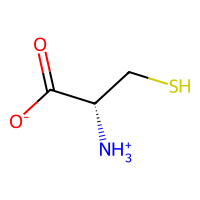

In [14]:
PandasTools.AddMoleculeColumnToFrame(aminoacids_df, smilesCol='SMILES')
aminoacids_df.head()

# Molecular Descriptors
We can use RDKit to generate a variety of molecular descriptors.

In [15]:
from rdkit.Chem import Descriptors

## Simple Descriptors

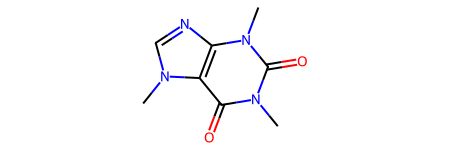

In [16]:
caffeine

In [17]:
# Some descriptors for Caffeine:
print("Molecular Weight: ", Descriptors.MolWt(caffeine))
print("Exact Molecular Weight: ", Descriptors.ExactMolWt(caffeine))
print("LogP: ", Descriptors.MolLogP(caffeine))
print("Number of Valence Electrons: ", Descriptors.NumValenceElectrons(caffeine))
print("Number of Hydrogen Bond Acceptors: ", Descriptors.NumHAcceptors(caffeine))
print("Number of Hydrogen Bond Donors: ", Descriptors.NumHDonors(caffeine))

Molecular Weight:  194.194
Exact Molecular Weight:  194.08037556
LogP:  -1.0293
Number of Valence Electrons:  74
Number of Hydrogen Bond Acceptors:  6
Number of Hydrogen Bond Donors:  0


For a complete list of available descriptors, see the [here](https://rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors).

## Properties in Pandas DataFrame
You can also easily add columns to a Pandas DataFrame:

,name,SMILES,ROMol,MolWt
0,alanine,C[C@@H](C(=O)[O-])[NH3+],,89.094
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-],,175.212
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-],,132.119
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-],,132.095
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S,,121.161

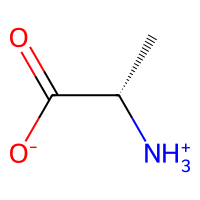
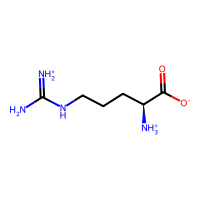
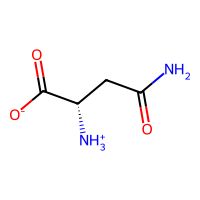
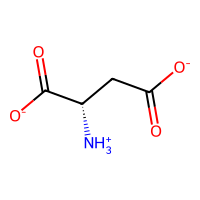
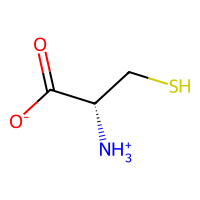

In [18]:
aminoacids_df['MolWt'] = [Descriptors.MolWt(x) for x in aminoacids_df.ROMol]
aminoacids_df.head()

## Molecular Fingerprints

Molecular fingerprints are a way to encode the structural characteristics of a molecule into a bitvector. In general terms, a fingerprinting algorithm examines the molecule and generates patterns for atoms and groups in the molecule. Each pattern is hashed to produce a series of bits which are added (logical OR) to produce the final bitvector, called the "fingerprint." More details on the theory behind fingerprints can be found on [Fingerprints - Screening and Similarity (Daylight)](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html).

One very useful consequence is that similar molecules have, in most cases, similar fingerprints, and the "difference" between the molecules can be calculated mathematically. Many similarity metrics have been proposed to compare molecules, and a brief summare can be found [here](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.02%3A_Similarity_Coefficients). 
For example, the most used measure of similarity between two molecules is the *Jaccard-Tanimoto Similarity*, defined as the ratio of the intersection and union of two sets:

$$
S_{AB} = \frac{|A \cap B|}{|A \cup B|} = \frac{c}{a+b-c} \tag{1}
$$
where:
- $a$: Features only present in molecule A
- $b$: Features only present in molecule B
- $c$: Features present in *both* molecules

There are different ways to generate patterns, and that defines the type of fingerprint. For example,
- MACCS (Molecular ACCess System) Keys: Defined by a commercial company, contains 966 structural keys. The [public set](https://janiceto.github.io/ml-knowledge-base/02-data-preparation/feature-engineering/maccs.html) has only 166 keys, and is implemented in RDKit.
- [ECFP](https://pubs.acs.org/doi/10.1021/ci100050t) (Extended Connecticity Fingerprints): Probably the most used kind of fingerprint, uses an algorithm that iterates over each atom in the molecule and traces all paths starting from that atom, up to some determined length. For each path, it creates a separate hash to be added.  In the end, the patterns are combined ("folded") into a single bitvector, wich is usually 1024 or 2048 bits long (but other sizes can be used as well). See also the description [here](https://janiceto.github.io/ml-knowledge-base/02-data-preparation/feature-engineering/morgan.html).

Besides those two, RDKit provides a number of different fingerprints (see [here](https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity).)

<div class="alert alert-info">
<b>NOTE:</b> 

The fingerprinting modules are not loaded by default with the `Chem` module, and we need to request the full `AllChem` to use it.
</div>

In [19]:
from rdkit.Chem import AllChem

First, let's create a fingerprint generator object. Here, we use Morgan (ECFP) with radius 2:

In [20]:
fpgen = AllChem.GetMorganGenerator(radius=2)

We can use this to generate fingerprints for molecules. For example, we can generate the fingerprint directly as a NumPy array:

In [21]:
fpgen.GetCountFingerprintAsNumPy(caffeine)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)

Or, we can generate as a `bitvector` object:

In [22]:
fpgen.GetFingerprint(caffeine)

The `DataStructs` subpackage contains functions to operate with fingerprints (amongst many other things)

In [23]:
from rdkit import DataStructs

In [24]:
caffeine_fp = fpgen.GetFingerprint(caffeine)
aspirin_fp  = fpgen.GetFingerprint(aspirin)

print(f"Tanimoto Similarity between Caffeine and Aspirin: {DataStructs.TanimotoSimilarity(caffeine_fp,aspirin_fp):0.2f}")

Tanimoto Similarity between Caffeine and Aspirin: 0.09


Those molecules are nothing alike. What if we look at some caffeine metabolites?

Caffeine is [rapidly absorbed by the gastrointestinal tract and it is metabolized in the liver to form three major metabolites](https://doi.org/10.3390/molecules24162863): 84% paraxanthine (1,7-dimethylxanthine), 12% theobromine (3,7-dimethylxanthine), and 4% theophylline (1,3-dimethylxanthine):

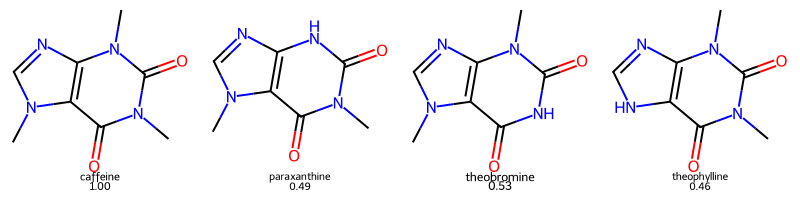

In [25]:
paraxanthine = Chem.MolFromSmiles('Cn1c(=O)[nH]c2ncn(C)c2c1=O')
theobromine  = Chem.MolFromSmiles('Cn1cnc2c1c(=O)[nH]c(=O)n2C')
theophylline = Chem.MolFromSmiles('Cn1c(=O)c2[nH]cnc2n(C)c1=O')

mols  = [caffeine, paraxanthine, theobromine, theophylline]
names = ['caffeine', 'paraxanthine', 'theobromine', 'theophylline']

# Calculate the similarity between the molecules and Caffeine
mols_fps = [fpgen.GetFingerprint(x) for x in mols]
mols_sim = [DataStructs.TanimotoSimilarity(caffeine_fp,x) for x in mols_fps]

# This is to align all the molecules to a common scaffold
template = Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(caffeine)
_ = AllChem.Compute2DCoords(template)
for m in mols:
    _ = AllChem.GenerateDepictionMatching2DStructure(m,template)

legends = []
for name, sim in zip(names,mols_sim):
    legends.append(f"{name}\n{sim:0.2f}")
Draw.MolsToGridImage(mols, 
                     molsPerRow=4,
                     subImgSize=(200,200),
                     legends=legends,
                     useSVG=True)

# 3D Structure

Finally, how about 3D structures? We can use RDKit to generate 3D structures using a force field. It's not perfect, but its OK.

To create a 3D representation of the molecule, we needd to:

1. Add hydrogens to the molecule
2. Generate 3D structure using the ETKDG method
3. Optimize the structure with a force field

In [26]:
# Create a 3D representation of the molecule
def molecule_to_3d(molecule):
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    params = AllChem.ETKDGv3()
    params.randomSeed = 42 # optional random seed for reproducibility
    AllChem.EmbedMolecule(mol,params)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

Let's create a 3D representation of Aspirin, and visualize with RDKit:

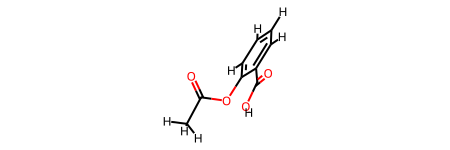

In [27]:
aspirin_3d = molecule_to_3d(aspirin)
aspirin_3d

That's OK, but it could be better, no?

let's use another nice package to visualize the structure in 3D. The package is "Py3DMol", which embeds the 3D molecular viewer [3dmol](http://3dmol.org/) in the Jupyter Notebook.

In [28]:
import py3Dmol

In [29]:
view = py3Dmol.view(
    data=Chem.MolToMolBlock(aspirin_3d),  # Convert the RDKit molecule for py3Dmol
    style={"stick": {}, "sphere": {"scale": 0.3}}
)
view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

There's a nice tutorial of Py3DMol [here](https://www.insilicochemistry.io/tutorials/foundations/chemistry-visualization-with-py3dmol).

<div class="alert alert-success">
<b>That's it!</b> 
We're done for today.</div>

# Dig Deeper
We barely scratched the surface on what RDKit can do. To dig deeper, take a look at:

- Charles J. Weiss, Scientific Computing for Chemists with Python, Chapter 15: [Cheminformatics with RDKit](https://weisscharlesj.github.io/SciCompforChemists/notebooks/chapter_15/chap_15_notebook.html) (Visited: 8/15/2024)
- Philippe Schwaller, Practical Programming in Chemistry, [Lecture 5: Cheminformatics and RDKit: An Introduction](https://schwallergroup.github.io/practical-programming-in-chemistry/tutorials/lecture_05/01_rdkit_basics.html) (Visited: 8/14/2024)
- Greg Landrum, [RDKit Documentation](https://www.rdkit.org/docs/index.html)
    - [RDKit Blog](https://greglandrum.github.io/rdkit-blog/) (8/15/2024) 
    - [Getting Started with RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html) (8/14/2024)
    - [The RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html) (8/15/2024)
- Pat Walters, [Practical Cheminformatics Blog](https://practicalcheminformatics.blogspot.com/) (8/14/2024)
    - Collab Notebook: [A_Whirlwind_Introduction_To_The_RDKit](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb) (8/14/2024)

- Other Collab Notebooks:
    - Oliver Koch, [Cheminformatics](https://colab.research.google.com/github/kochgroup/intro_pharma_ai/blob/main/Notebooks_EN/03 - Cheminformatics.ipynb)
